## Paqueterias

In [54]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

## Creación Juego

In [55]:
random.seed(42)
aleatorio = []

for i in range(500):
    aleatorio.append(np.random.randint(0,2))
    
jugadores_nombres = ["Rick", "Friedman", "Joss", "GraasKamp", "Tit_for_tat"]
jugadores = []


Rick = []
ceros_Rick = 0
for i in aleatorio:
    if ceros_Rick == 2:
        Rick.append(0)
    else:
        Rick.append(i)
        ceros_Rick = ceros_Rick + 1 if i == 0 else 0
jugadores.append(Rick)

Friedman = []
ceros = False  
for jugada in aleatorio:
    if not ceros:
        Friedman.append(1)  
        if jugada == 0:
            ceros = True  
    else:
        Friedman.append(0)  

jugadores.append(Friedman)


Joss = []
for i in range(len(aleatorio)):
    if i == 0:
        Joss.append(1)
    elif (i + 1) % 10 == 0:
        Joss.append(0)
    else:
        Joss.append(aleatorio[i - 1])
jugadores.append(Joss)

GraasKamp = []
for i in range(len(aleatorio)):
    if i == 0:
        GraasKamp.append(1)
    elif (i + 1) % 20 == 0:
        GraasKamp.append(0)
    else:
        GraasKamp.append(aleatorio[i - 1])
jugadores.append(GraasKamp)

Tit_for_tat= []
for i in range(len(aleatorio)):
    if i == 0:
        Tit_for_tat.append(1)
    else:
        Tit_for_tat.append(aleatorio[i])
jugadores.append(Tit_for_tat)

## Función de pagos

In [56]:
def calcular_pagos(aleatorio, jugador):
    pagos_a, pagos_j = 0, 0  
    pagos_al, pagos_ju = [], []

    for i in range(len(aleatorio)):
        if aleatorio[i] == jugador[i]: 
            pago = 3 if aleatorio[i] == 1 else 1
            pagos_a += pago
            pagos_j += pago
        else:  
            pagos_a += 1 if aleatorio[i] == 1 else 5
            pagos_j += 1 if jugador[i] == 1 else 5

        pagos_al.append(pagos_a)
        pagos_ju.append(pagos_j)

    return pagos_al, pagos_ju

## Simulación Juegos

In [57]:
dataframes = []

for i, jugador in enumerate(jugadores):
    nombre = jugadores_nombres[i]
    pagos_A, pagos_J = calcular_pagos(aleatorio, jugador)
    
    df = pd.DataFrame({
        "Aleatorio": aleatorio,
        nombre: jugador,
        "Pago_Aleatorio": pagos_A,
        f"Pago_{nombre}": pagos_J
    })
    
    dataframes.append(df)

dataframes[1]


,Aleatorio,Friedman,Pago_Aleatorio,Pago_Friedman
0,1,1,3,3
1,0,1,8,4
2,1,0,9,9
3,1,0,10,14
4,1,0,11,19
...,...,...,...,...
495,0,0,502,1530
496,0,0,503,1531
497,0,0,504,1532
498,1,0,505,1537


## Gráficas

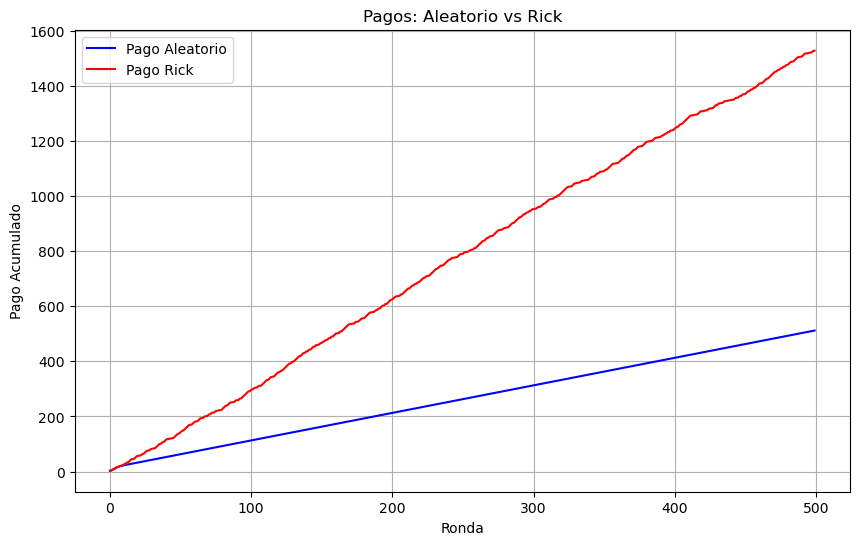

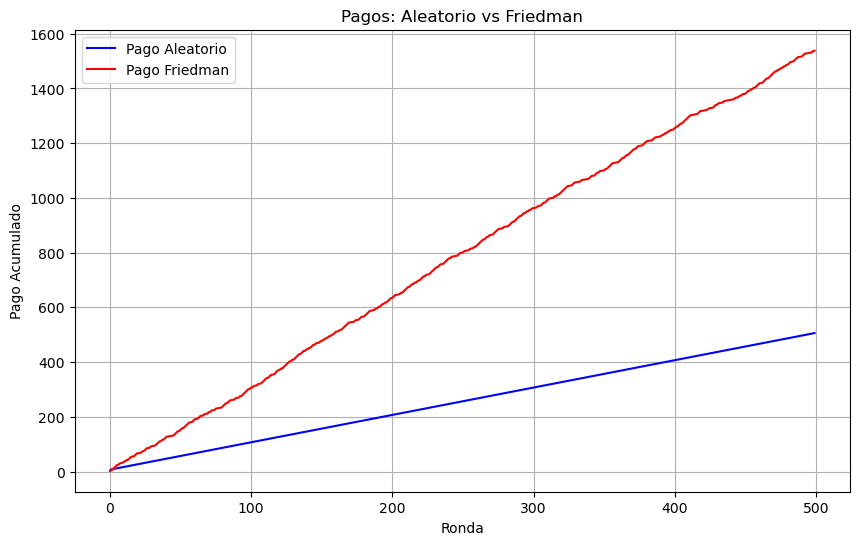

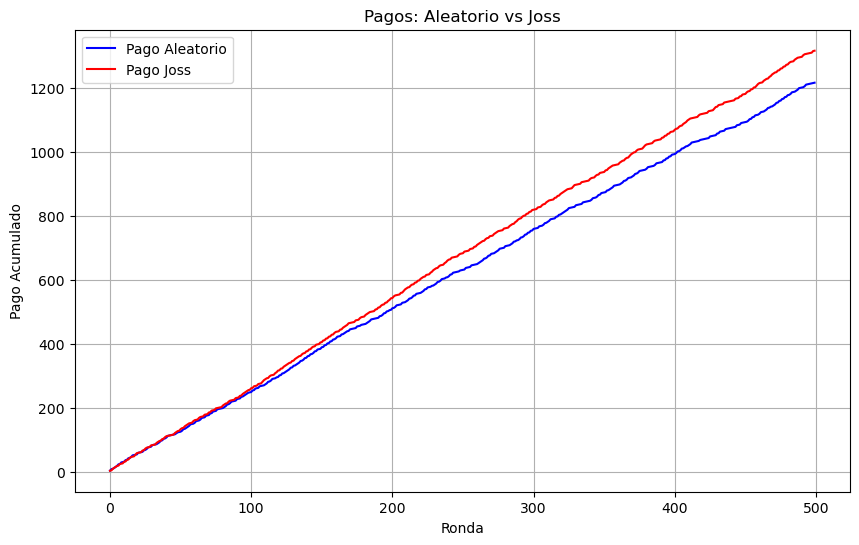

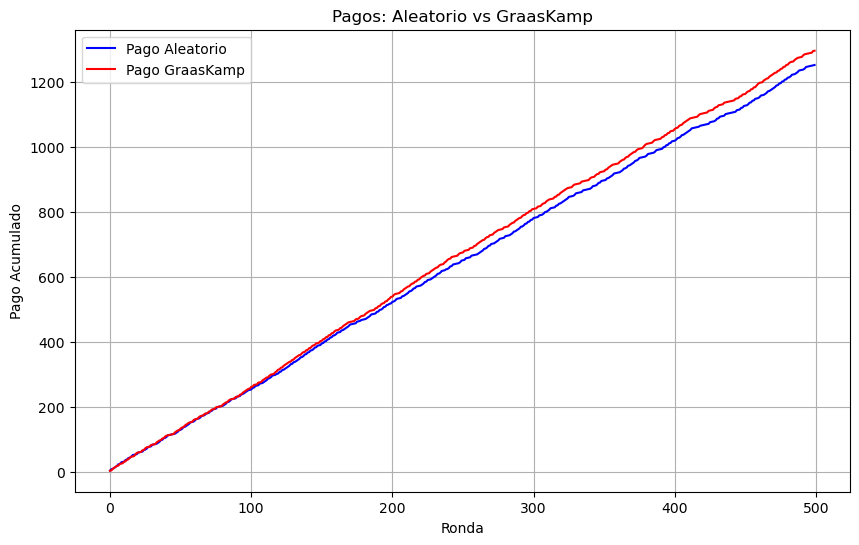

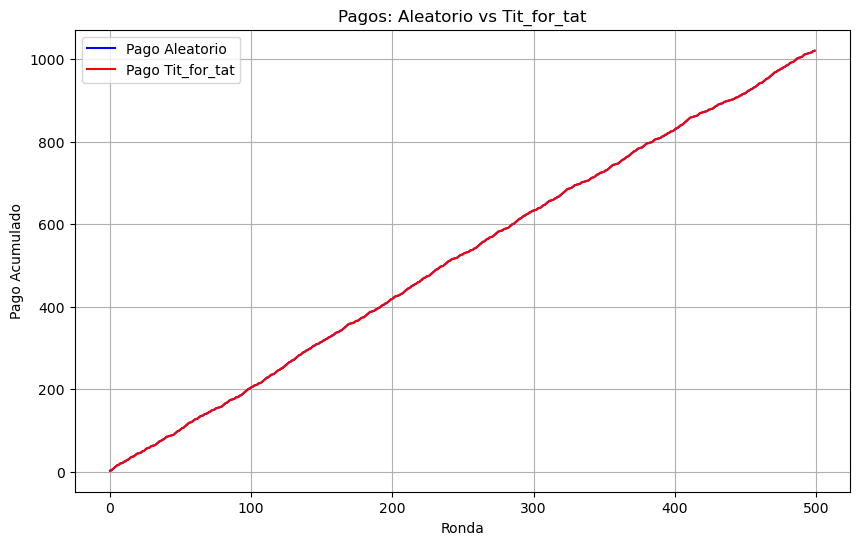

In [58]:
for i, df in enumerate(dataframes):
    nombre_jugador = df.columns[1]
    
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df["Pago_Aleatorio"], label="Pago Aleatorio", color="blue")
    plt.plot(df.index, df[f"Pago_{nombre_jugador}"], label=f"Pago {nombre_jugador}", color="red")
    
    plt.title(f"Pagos: Aleatorio vs {nombre_jugador}")
    plt.xlabel("Ronda")
    plt.ylabel("Pago Acumulado")
    plt.legend()
    plt.grid(True)
    
